In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
df = pd.read_csv('../other/frac_merge_peak.csv')


In [3]:
X = df[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing', u'Perfs/Cluster', 
        u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', 
        u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', 
        u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', 
        u'XEC_FIELD', u'Reservoir']]
y = df[[u'OIL_Peak']]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_primary = X_train[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Perfs/Cluster', 
                           u'Fluid_Bbls', u'Prop_Lbs', u'XEC_FIELD', u'Reservoir']]
X_train_secondary = X_train[[u'Cluster_Spacing', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', 
                             u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc',
                             u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', 
                             u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', u'XEC_FIELD', u'Reservoir']]
X.shape, X_train.shape, X_test.shape


((178, 27), (133, 27), (45, 27))

In [57]:
print 'All:'
print X.groupby('XEC_FIELD')['XEC_FIELD'].count()
print
print 'Train:'
print X_train.groupby('XEC_FIELD')['XEC_FIELD'].count()
print
print 'Test:'
print X_test.groupby('XEC_FIELD')['XEC_FIELD'].count()

All:
XEC_FIELD
COTTONWOOD DRAW    14
DIXIELAND          47
FORD, WEST         91
GRISHAM             9
PHANTOM             7
RED HILLS           1
STATELINE           3
TWO GEORGES         6
Name: XEC_FIELD, dtype: int64

Train:
XEC_FIELD
COTTONWOOD DRAW    12
DIXIELAND          33
FORD, WEST         66
GRISHAM             7
PHANTOM             7
RED HILLS           1
STATELINE           2
TWO GEORGES         5
Name: XEC_FIELD, dtype: int64

Test:
XEC_FIELD
COTTONWOOD DRAW     2
DIXIELAND          14
FORD, WEST         25
GRISHAM             2
STATELINE           1
TWO GEORGES         1
Name: XEC_FIELD, dtype: int64


In [58]:
print 'All:'
print X.groupby('Reservoir')['Reservoir'].count()
print
print 'Train:'
print X_train.groupby('Reservoir')['Reservoir'].count()
print
print 'Test:'
print X_test.groupby('Reservoir')['Reservoir'].count()

All:
Reservoir
Wolfcamp Shale A    89
Wolfcamp Shale C    14
Wolfcamp Shale D    75
Name: Reservoir, dtype: int64

Train:
Reservoir
Wolfcamp Shale A    69
Wolfcamp Shale C     9
Wolfcamp Shale D    55
Name: Reservoir, dtype: int64

Test:
Reservoir
Wolfcamp Shale A    20
Wolfcamp Shale C     5
Wolfcamp Shale D    20
Name: Reservoir, dtype: int64


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Text yticklabel objects>)

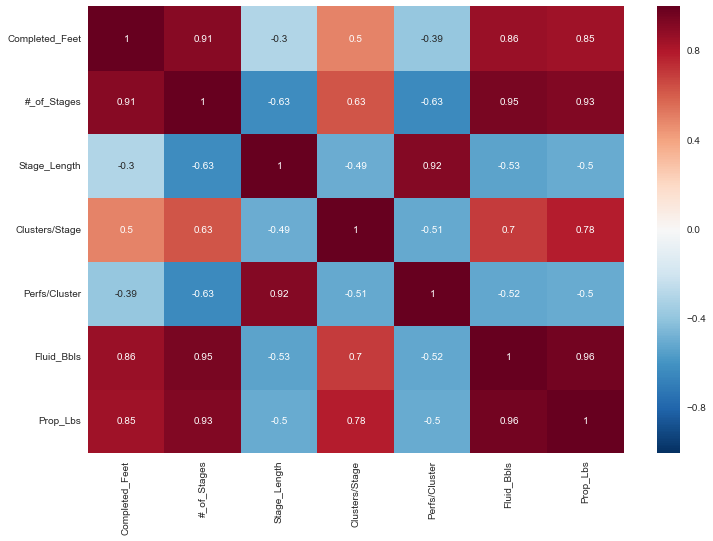

In [71]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1).corr(), annot=True, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [11]:
X_mod_int = sm.add_constant(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1))
model = sm.OLS(y_train, X_mod_int)
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     10.47
Date:                Fri, 04 Nov 2016   Prob (F-statistic):           2.67e-10
Time:                        09:02:01   Log-Likelihood:                -901.86
No. Observations:                 133   AIC:                             1820.
Df Residuals:                     125   BIC:                             1843.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const           1051.0072    345.812      3.

In [6]:
model = sm.OLS(y_train, X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1))
model = model.fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     148.6
Date:                Fri, 04 Nov 2016   Prob (F-statistic):           1.02e-57
Time:                        08:34:00   Log-Likelihood:                -906.60
No. Observations:                 133   AIC:                             1827.
Df Residuals:                     126   BIC:                             1847.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Completed_Feet     0.0156      0.037      0.

In [7]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1), y_train)
print model.score(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1), y_train), model.intercept_, model.coef_

0.369520395777 [ 1051.00715898] [[  1.06225013e-01  -1.94659857e+01  -2.29249016e+00  -2.91311940e+01
   -1.09381283e+00   8.20364958e-04  -3.95883168e-06]]


In [9]:
model = LinearRegression(fit_intercept=False, normalize=False)
model.fit(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1), y_train)
print model.score(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1), y_train), model.intercept_, model.coef_

0.322930461528 0.0 [[  1.56444250e-02   1.73905693e+01   4.29471046e-01   6.79616483e+01
   -9.98445487e+00   7.88164696e-04  -4.85491585e-05]]


In [17]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train[[u'Clusters/Stage', u'Perfs/Cluster', u'#_of_Stages', u'Fluid_Bbls']], y_train)
print model.score(X_train[[u'Clusters/Stage', u'Perfs/Cluster', u'#_of_Stages', u'Fluid_Bbls']], y_train), model.intercept_, model.coef_

0.34133130687 [ 666.38718114] [[ -4.38921946e+01  -1.57224900e+01   7.20340864e+00   4.23739065e-04]]


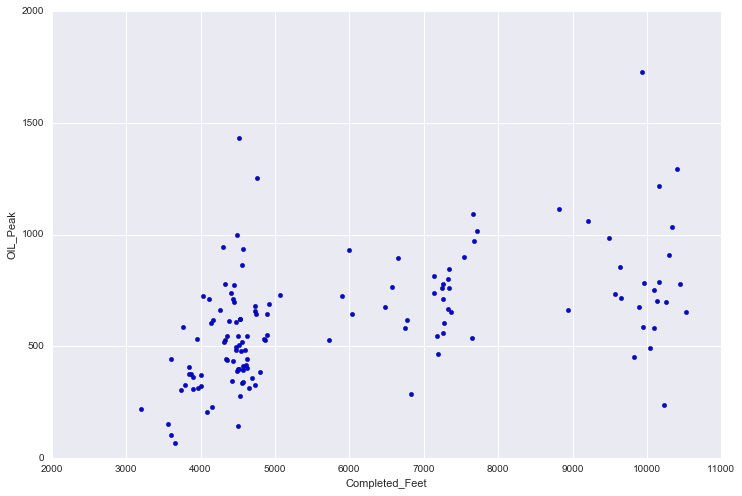

In [66]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Completed_Feet'], y_train)
ax.set_ylim([0,2000])
ax.set_xlabel('Completed_Feet')
ax.set_ylabel('OIL_Peak')


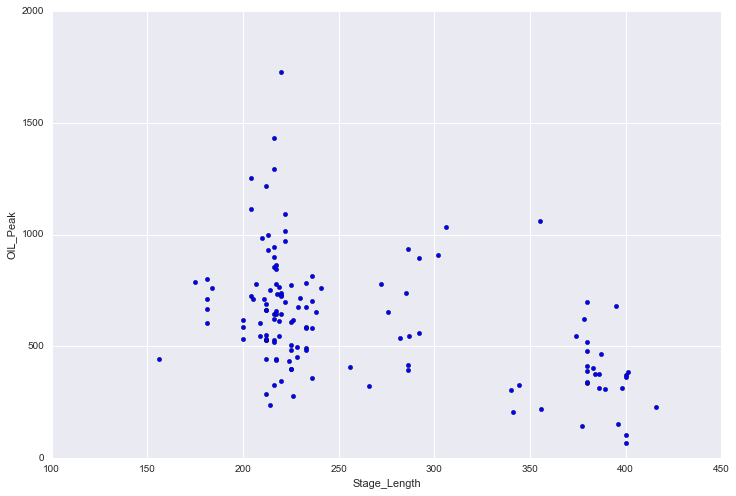

In [67]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Stage_Length'], y_train)
ax.set_ylim([0,2000])
ax.set_xlabel('Stage_Length')
ax.set_ylabel('OIL_Peak')


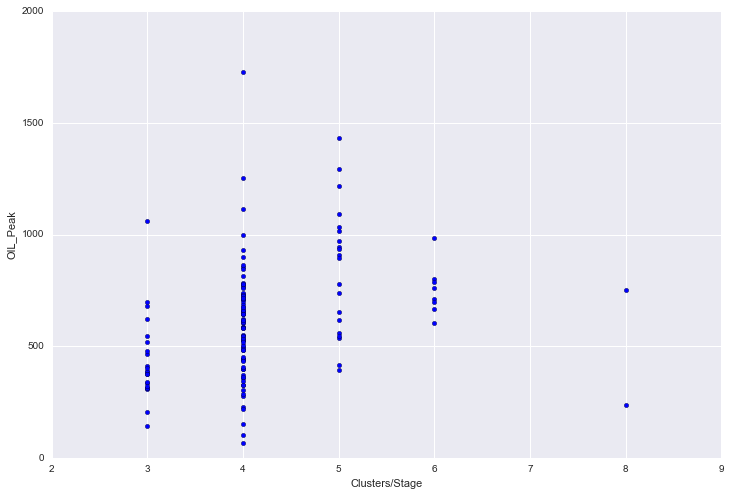

In [68]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Clusters/Stage'], y_train)
ax.set_ylim([0,2000])
ax.set_xlabel('Clusters/Stage')
ax.set_ylabel('OIL_Peak')


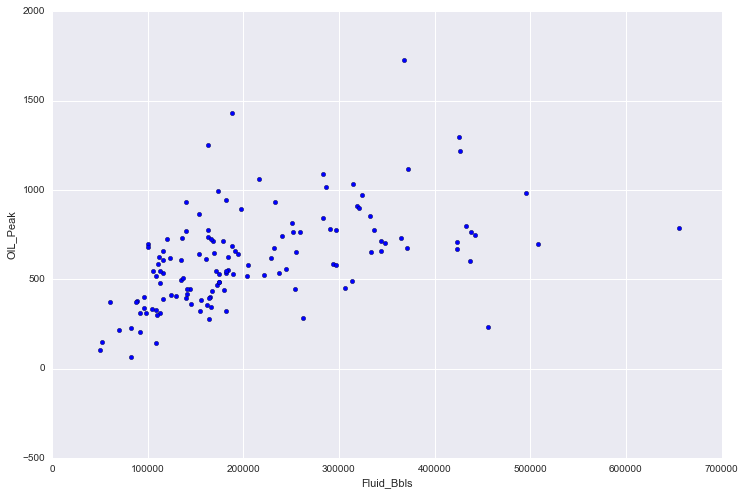

In [69]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Fluid_Bbls'], y_train)
ax.set_xlabel('Fluid_Bbls')
ax.set_ylabel('OIL_Peak')


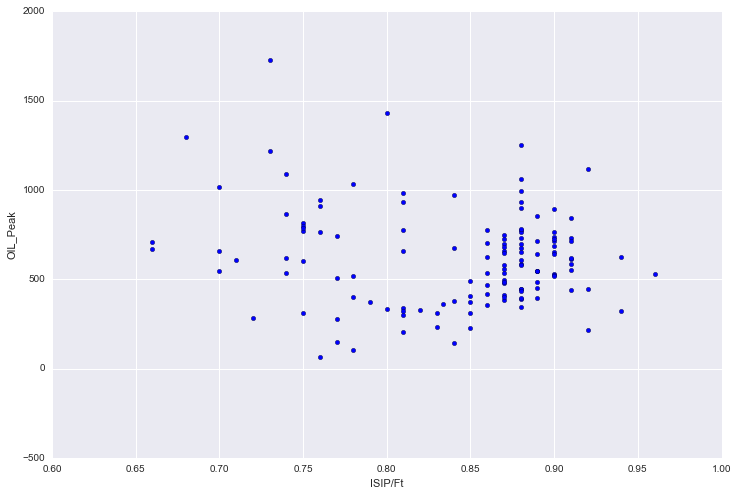

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['ISIP/Ft'], y_train)
ax.set_xlabel('ISIP/Ft')
ax.set_ylabel('OIL_Peak')


In [15]:
X.columns

Index([u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage',
       u'Cluster_Spacing', u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft',
       u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft',
       u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc',
       u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster',
       u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft',
       u'5"_SIP/Ft'],
      dtype='object')

In [13]:
# X_RFE = X_train[[u'ISIP/Ft', u'5"_SIP/Ft', u'Rate/Ft', u'Rate/Perf', u'Avg_Prop_Conc', u'Perfs/Cluster', u'Rate/Cluster', 
#            u'Clusters/Stage', u'Avg_Rate', u'Max_Prop_Conc', u'Max_Rate', u'Cluster_Spacing', u'Stage_Length',
#            u'#_of_Stages', u'Fluid_Gal/Ft', u'Prop_Lbs/Ft', u'Prop_Lbs/Perf', u'Avg_Pressure', u'Fluid_Gal/Perf',
#            u'Max_Pressure', u'Completed_Feet', u'Prop_Lbs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Cluster', u'Prop_Lbs']]
X_RFE = X_train[[u'ISIP/Ft', u'5"_SIP/Ft', u'Rate/Ft', u'Rate/Perf', u'Avg_Prop_Conc', u'Perfs/Cluster', u'Rate/Cluster', 
           u'Clusters/Stage', u'Avg_Rate', u'Max_Prop_Conc', u'Max_Rate', u'Cluster_Spacing', u'Stage_Length',
           u'#_of_Stages', u'Fluid_Gal/Ft']]
X_RFE.shape


(133, 15)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5]),
 <a list of 15 Text yticklabel objects>)

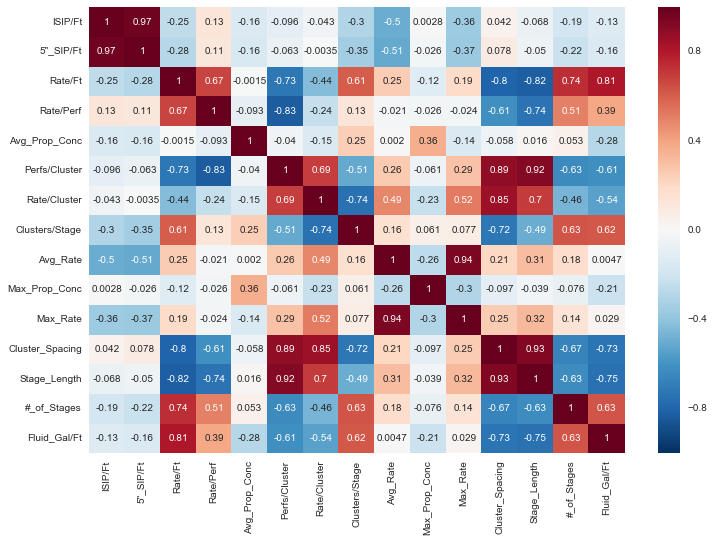

In [62]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(X_RFE.corr(), annot=True, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [16]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_RFE, y_train)
print model.score(X_RFE, y_train), model.intercept_, model.coef_

0.527293373869 [ 3225.05767133] [[ -2.87823848e+03   2.74222702e+03  -1.73981431e+02  -3.35719918e+02
   -1.54643564e+01  -5.39120765e+01  -2.19235151e+02  -4.63802869e+02
    6.17961807e+01  -1.43105519e+01   1.38908003e+01   2.76689222e+01
   -8.69139304e+00   8.15923093e+00  -2.17190333e-01]]


In [20]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_RFE.drop(['5"_SIP/Ft', 'Stage_Length'], axis=1), y_train)
print model.score(X_RFE.drop(['5"_SIP/Ft', 'Stage_Length'], axis=1), y_train), model.intercept_, model.coef_

0.475336382821 [ 2367.0132908] [[ -1.23401436e+02   3.58857338e+03  -5.61694223e+02  -4.46202360e+01
   -9.58512812e+01  -7.07714409e+01  -3.62855707e+02   1.00096782e+01
   -2.35871946e+01   1.96523292e+01   5.74889258e+00   8.99434935e+00
   -2.81748049e-01]]
